In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
data_all = pd.read_csv(r"D:\Download\COVID19\WHO-COVID-19-global-data.csv", index_col=None)

In [3]:
data_all.columns = data_all.columns.str.replace(' ', '')

In [4]:
data_all.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      63215 non-null  object
 1   Country_code       62946 non-null  object
 2   Country            63215 non-null  object
 3   WHO_region         63215 non-null  object
 4   New_cases          63215 non-null  int64 
 5   Cumulative_cases   63215 non-null  int64 
 6   New_deaths         63215 non-null  int64 
 7   Cumulative_deaths  63215 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [6]:
data_all.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,63215.000000,6.321500e+04,63215.000000,63215.000000
mean,517.771810,3.651005e+04,15.680202,1474.109990
std,3788.950602,2.725697e+05,108.257858,9350.207733
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,1.450000e+02,0.000000,2.000000
75%,57.000000,3.906000e+03,1.000000,78.000000
max,97894.000000,6.960152e+06,6409.000000,202478.000000


In [7]:
site_cn = data_all[['Date_reported',"New_cases"]][data_all.Country == "China"]
site_cn_group =  site_cn.groupby(['Date_reported'],as_index=False).sum()
site_cn_group.rename(columns={"New_cases":"NC_cn_24h"}, inplace=True)

site_au = data_all[['Date_reported',"New_cases"]][data_all.Country == "Australia"]
site_au_group =  site_au.groupby(['Date_reported'],as_index=False).sum()
site_au_group.rename(columns={"New_cases":"NC_au_24h"}, inplace=True)

site_it = data_all[['Date_reported',"New_cases"]][data_all.Country == "Italy"]
site_it_group =  site_it.groupby(['Date_reported'],as_index=False).sum()
site_it_group.rename(columns={"New_cases":"NC_it_24h"}, inplace=True)

site_us = data_all[['Date_reported',"New_cases"]][data_all.Country == "United States of America"]
site_us_group =  site_us.groupby(['Date_reported'],as_index=False).sum()
site_us_group.rename(columns={"New_cases":"NC_us_24h"}, inplace=True)


all_data_df = site_cn_group.merge(site_au_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_it_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_us_group, left_on='Date_reported', right_on='Date_reported')

# Australia

In [8]:
site_au_group

,Date_reported,NC_au_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,30
265,2020-09-24,31
266,2020-09-25,10
267,2020-09-26,17


In [9]:
site_au_group.Date_reported =  pd.to_datetime(site_au_group.Date_reported)
site_au_group.Date_reported

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
264   2020-09-23
265   2020-09-24
266   2020-09-25
267   2020-09-26
268   2020-09-27
Name: Date_reported, Length: 269, dtype: datetime64[ns]

In [10]:
site_au_group.set_index('Date_reported', inplace=True)

In [11]:
print(site_au_group.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2020-01-03 to 2020-09-27
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   NC_au_24h  269 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB
None


In [12]:
date_time =  site_au_group.index
date_time

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27'],
              dtype='datetime64[ns]', name='Date_reported', length=269, freq=None)

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg

In [14]:
selected_features = ['NC_au_24h']

features = site_au_group[selected_features]
features.index = date_time
features.head()

,NC_au_24h
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


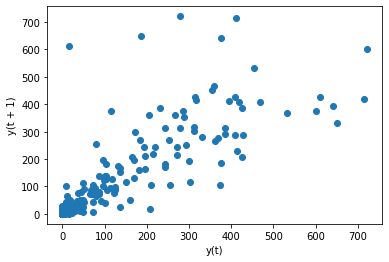

In [15]:
%matplotlib inline

lag_plot(features['NC_au_24h'])
plt.show()

In [16]:
ad_fuller_result = adfuller(features['NC_au_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.428729688953197
p-value: 0.1337912881358546


<font size="2">We have a large negative ADF statistic and P value bigger than 0.05, thus we can reject the null hypothesis and say our time series is stationary. Next step should be look at PACF</font>

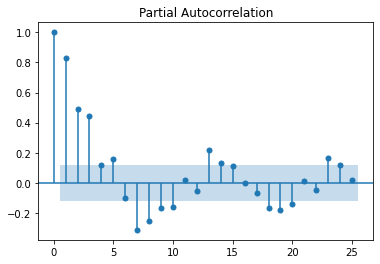

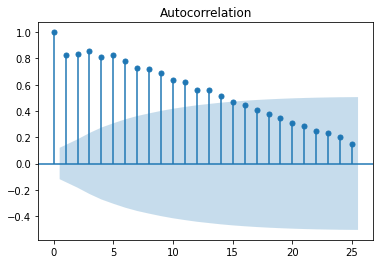

In [17]:
plot_pacf(features['NC_au_24h']);
plot_acf(features['NC_au_24h']);

In [18]:
rho, sigma = yule_walker(features['NC_au_24h'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.15435361 -0.26062735 -0.42161678 -0.12166425]
sigma: 64.50296324680508


<font size="2">
Thus our final equation is y(t) = 65.503 -0.15y(t-1) -0.25y(t-2) - 0.42y(t-3) -0.12y(t-4)</font>

In [19]:
result_data_only = features['NC_au_24h']

In [20]:
result_data_only

Date_reported
2020-01-03     0
2020-01-04     0
2020-01-05     0
2020-01-06     0
2020-01-07     0
              ..
2020-09-23    30
2020-09-24    31
2020-09-25    10
2020-09-26    17
2020-09-27    16
Name: NC_au_24h, Length: 269, dtype: int64

In [21]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [22]:

res = AutoReg(result_data_only, lags = 4).fit()

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [23]:
print(out.format(res.aic, res.hqic, res.bic))

AIC: 8.430, HQIC: 8.462, BIC: 8.511


In [24]:
res = AutoReg(result_data_only, lags=4, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 8.428, HQIC: 8.482, BIC: 8.563


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [25]:
train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept       4.936947
NC_au_24h.L1    0.176715
NC_au_24h.L2    0.262996
NC_au_24h.L3    0.409346
NC_au_24h.L4    0.104948
dtype: float64


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [26]:

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=32.750186, expected=30.000000
predicted=5.729951, expected=31.000000
predicted=30.899934, expected=10.000000
predicted=39.031381, expected=17.000000
predicted=28.607600, expected=16.000000
Test RMSE: 18.586


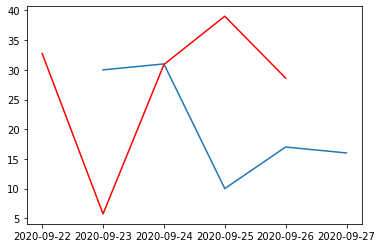

In [27]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Coefficients: intercept       5.894492
NC_au_24h.L1    0.173913
NC_au_24h.L2    0.261902
NC_au_24h.L3    0.409322
NC_au_24h.L4    0.107066
dtype: float64
predicted=99.047756, expected=43.000000
predicted=65.237866, expected=52.000000
predicted=79.057363, expected=91.000000
predicted=76.060113, expected=48.000000
predicted=59.392192, expected=52.000000
predicted=59.247738, expected=42.000000
predicted=49.954164, expected=44.000000
predicted=64.359465, expected=41.000000
predicted=63.792226, expected=46.000000
predicted=46.211468, expected=41.000000
predicted=42.120263, expected=34.000000
predicted=25.892028, expected=48.000000
predicted=54.238371, expected=24.000000
predicted=57.565772, expected=13.000000
predicted=39.915324, expected=14.000000
predicted=32.750186, expected=30.000000
predicted=5.729951, expected=31.000000
predicted=30.899934, expected=10.000000
predicted=39.031381, expected=17.000000
predicted=28.607600, expected=16.000000
Test RMSE: 23.851


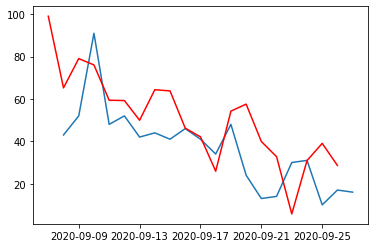

In [28]:
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [29]:
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

Test RMSE: 80.047


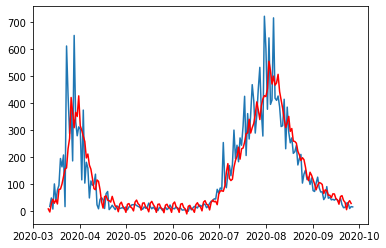

In [30]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [31]:
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

Test RMSE: 71.546


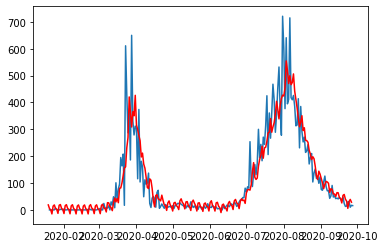

In [32]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

<font size="2">In this case, we could conclude the performance in autoregression is very successful in not only catching up the trends, but also close to the reality number in quantitative measurement.<br><br>
The disadvantage of Autoregression model is that it is a equation model, thus it require up-to-date input to generate tomorrow's prediction, and is harder to extend to longer future compare to LSTM</font>

# Italy

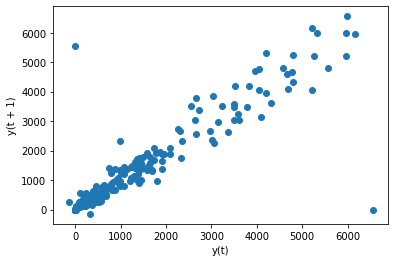

ADF Statistic: -2.37740166983437
p-value: 0.1482164593925191


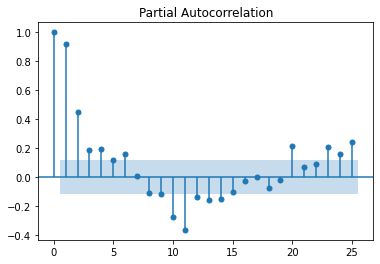

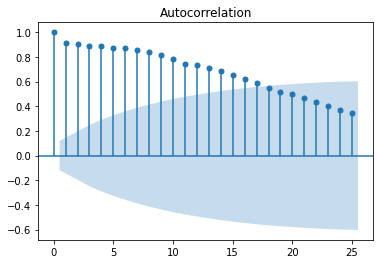

In [33]:
site_it_group.Date_reported =  pd.to_datetime(site_it_group.Date_reported)
site_it_group.set_index('Date_reported', inplace=True)
date_time =  site_it_group.index

selected_features = ['NC_it_24h']

features = site_it_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_it_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_it_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_it_24h']);
plot_acf(features['NC_it_24h']);

rho: [-0.39008245 -0.28403777 -0.10376092 -0.19282438]
sigma: 505.599376120514
AIC: 12.556, HQIC: 12.588, BIC: 12.637
AIC: 12.552, HQIC: 12.607, BIC: 12.688
Coefficients: intercept       50.823594
NC_it_24h.L1     0.408321
NC_it_24h.L2     0.284499
NC_it_24h.L3     0.095804
NC_it_24h.L4     0.177356
dtype: float64
predicted=1653.135763, expected=1391.000000
predicted=1376.835147, expected=1640.000000
predicted=1541.529194, expected=1786.000000
predicted=1604.065182, expected=1912.000000
predicted=1606.172930, expected=1869.000000
Test RMSE: 268.938


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


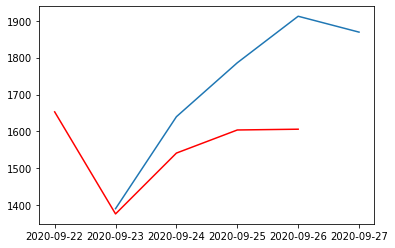

In [34]:
# Training sample 5
rho, sigma = yule_walker(features['NC_it_24h'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_it_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 4).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=4, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: intercept       50.201043
NC_it_24h.L1     0.403673
NC_it_24h.L2     0.287165
NC_it_24h.L3     0.101179
NC_it_24h.L4     0.174406
dtype: float64
predicted=1633.979238, expected=1150.000000
predicted=1303.134190, expected=1369.000000
predicted=1451.998000, expected=1700.000000
predicted=1436.577843, expected=1327.000000
predicted=1462.174528, expected=1616.000000
predicted=1438.285365, expected=1501.000000
predicted=1324.257588, expected=1456.000000
predicted=1651.099795, expected=1008.000000
predicted=1536.417456, expected=1229.000000
predicted=1286.247276, expected=1452.000000
predicted=1270.184507, expected=1583.000000
predicted=1181.758265, expected=1907.000000
predicted=1507.605229, expected=1637.000000
predicted=1715.860507, expected=1587.000000
predicted=1655.184629, expected=1350.000000
predicted=1653.135763, expected=1391.000000
predicted=1376.835147, expected=1640.000000
predicted=1541.529194, expected=1786.000000
predicted=1604.065182, expected=1912.000000
predi

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


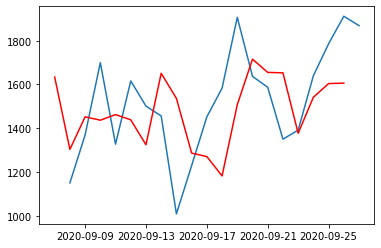

In [35]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Test RMSE: 639.524


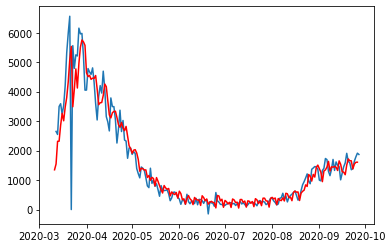

In [36]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 581.357


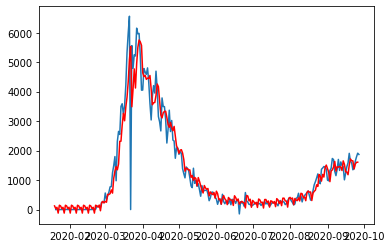

In [37]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()


# China

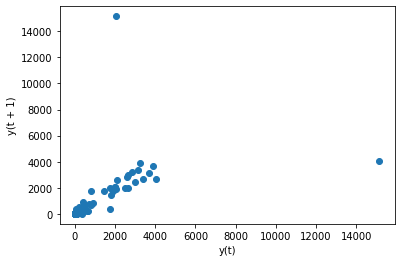

ADF Statistic: -2.9295593549240633
p-value: 0.04201704642193712


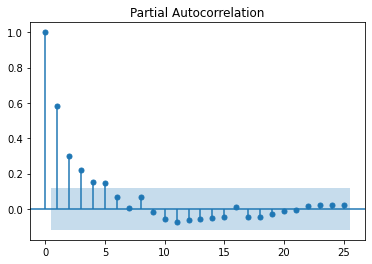

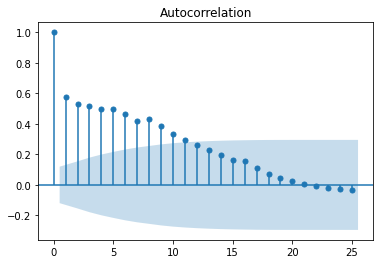

In [38]:
site_cn_group.Date_reported =  pd.to_datetime(site_cn_group.Date_reported)
site_cn_group.set_index('Date_reported', inplace=True)
date_time =  site_cn_group.index

selected_features = ['NC_cn_24h']

features = site_cn_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_cn_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_cn_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_cn_24h']);
plot_acf(features['NC_cn_24h']);

rho: [-0.3058473  -0.18002792 -0.16998326 -0.14974257]
sigma: 868.0291028663604
AIC: 13.601, HQIC: 13.633, BIC: 13.682
AIC: 13.614, HQIC: 13.668, BIC: 13.749
Coefficients: intercept       69.932218
NC_cn_24h.L1     0.309056
NC_cn_24h.L2     0.179433
NC_cn_24h.L3     0.167088
NC_cn_24h.L4     0.145554
dtype: float64
predicted=39.529206, expected=18.000000
predicted=13.695283, expected=10.000000
predicted=37.625933, expected=15.000000
predicted=309.670553, expected=18.000000
predicted=21.411196, expected=15.000000
Test RMSE: 131.226


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


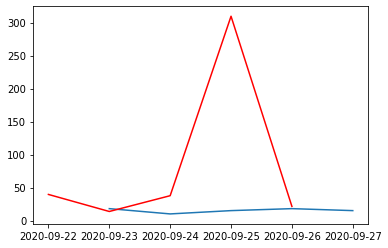

In [39]:
# Training sample 5
rho, sigma = yule_walker(features['NC_cn_24h'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_cn_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 4).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=4, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Coefficients: intercept       74.529617
NC_cn_24h.L1     0.308674
NC_cn_24h.L2     0.179092
NC_cn_24h.L3     0.166742
NC_cn_24h.L4     0.145172
dtype: float64
predicted=32.957318, expected=22.000000
predicted=18.611630, expected=9.000000
predicted=39.197082, expected=13.000000
predicted=311.018462, expected=28.000000
predicted=24.160468, expected=20.000000
predicted=30.170793, expected=23.000000
predicted=10.759781, expected=29.000000
predicted=37.047069, expected=23.000000
predicted=316.338958, expected=16.000000
predicted=29.051420, expected=19.000000
predicted=31.782111, expected=44.000000
predicted=12.835343, expected=17.000000
predicted=42.796365, expected=26.000000
predicted=314.532122, expected=36.000000
predicted=31.205869, expected=14.000000
predicted=39.529206, expected=18.000000
predicted=13.695283, expected=10.000000
predicted=37.625933, expected=15.000000
predicted=309.670553, expected=18.000000
predicted=21.411196, expected=15.000000
Test RMSE: 129.678


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


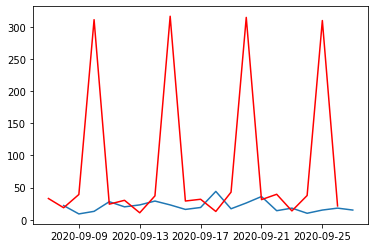

In [40]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 132.494


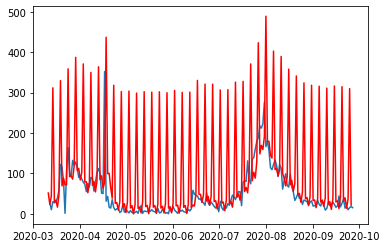

In [41]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 936.745


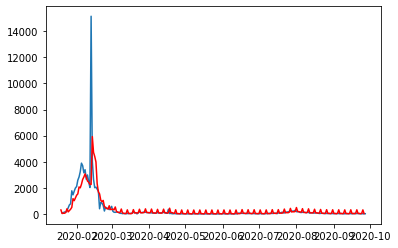

In [42]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

# US

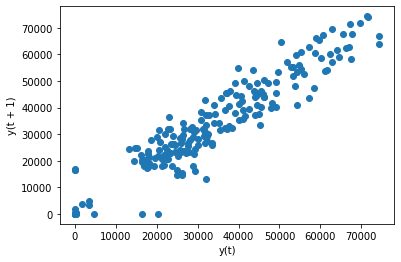

ADF Statistic: -1.4837014667773536
p-value: 0.541558032511702


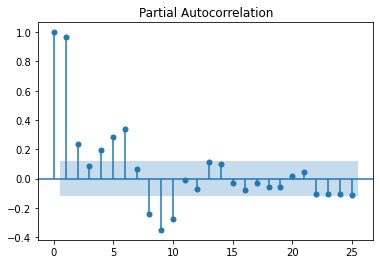

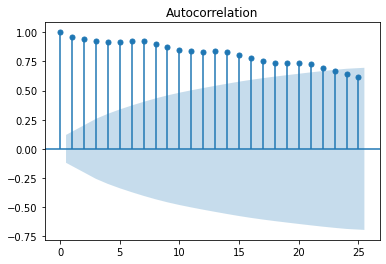

In [43]:
site_us_group.Date_reported =  pd.to_datetime(site_us_group.Date_reported)
site_us_group.set_index('Date_reported', inplace=True)
date_time =  site_us_group.index

selected_features = ['NC_us_24h']

features = site_us_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_us_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_us_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_us_24h']);
plot_acf(features['NC_us_24h']);

rho: [-0.70432586 -0.13694471  0.05412345 -0.19326577]
sigma: 5258.386875369685
AIC: 17.137, HQIC: 17.170, BIC: 17.218
AIC: 17.166, HQIC: 17.220, BIC: 17.301
Coefficients: intercept       813.460294
NC_us_24h.L1      0.725832
NC_us_24h.L2      0.132612
NC_us_24h.L3     -0.116120
NC_us_24h.L4      0.235660
dtype: float64
predicted=42297.872038, expected=39145.000000
predicted=37760.326021, expected=49176.000000
predicted=41077.759937, expected=40043.000000
predicted=46994.945723, expected=41254.000000
predicted=40270.007650, expected=50070.000000
Test RMSE: 7352.921


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


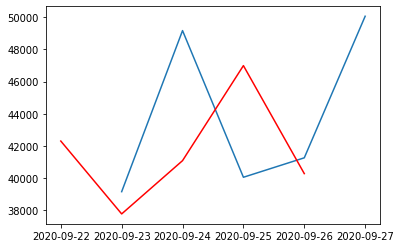

In [44]:
# Training sample 5
rho, sigma = yule_walker(features['NC_us_24h'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_us_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 4).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=4, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: intercept       772.243412
NC_us_24h.L1      0.667501
NC_us_24h.L2      0.170290
NC_us_24h.L3     -0.061229
NC_us_24h.L4      0.205020
dtype: float64
predicted=47864.222522, expected=33486.000000
predicted=44409.754343, expected=26015.000000
predicted=36595.207937, expected=23204.000000
predicted=30683.599424, expected=31988.000000
predicted=27821.727862, expected=37128.000000
predicted=32034.512469, expected=45523.000000
predicted=35218.722257, expected=40126.000000
predicted=40794.768781, expected=35177.000000
predicted=39062.582774, expected=34111.000000
predicted=35187.561695, expected=34078.000000
predicted=36553.590609, expected=40795.000000
predicted=35479.979779, expected=42618.000000
predicted=39592.654457, expected=48266.000000
predicted=41011.729625, expected=41695.000000
predicted=44571.058451, expected=36766.000000
predicted=42297.872038, expected=39145.000000
predicted=37760.326021, expected=49176.000000
predicted=41077.759937, expected=40043.000000
predicte

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


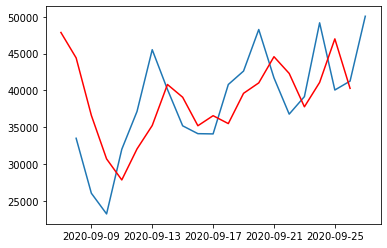

In [45]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 7063.423


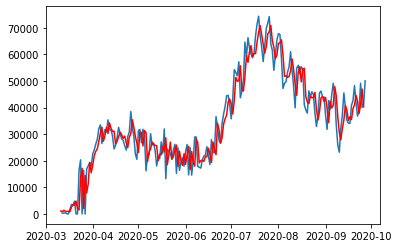

In [46]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 6303.795


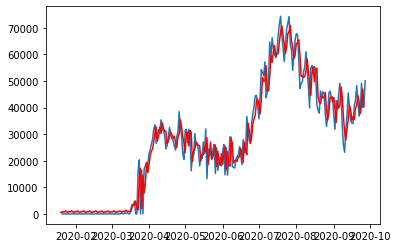

In [47]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()
